## EDA_PROJECT : SPORTS_ANALYSIS_FOR_THE_RECOMMENDED_PLAYERS

A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data based approach. During a recent hiring drive, you were selected for the Data Science team as a junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the players, the clubs they are currently playing for and various performance measures.
There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.


# Data:
The data contains details for over 18,000 players playing in various football clubs in Europe. It contains information on age, skill rating, wages and player value, etc. The files provided are as follows: 
fifa.csv – data file.
fifa_ variable_information.csv - information on individual variables.


# Data Pre-processing:

1.Import the necessary libraries and read the data.

In [1]:
#importing libraries numpy as np
import numpy as np

#importing pandas as pd
import pandas as pd

#importing matplotlib
import matplotlib.pyplot as plt

#importing seaborm as sns
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#reading the csv file 'fifa'
fifa=pd.read_csv('fifa.csv')
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
#read the second data set 'fifa_ variable_information'
fifa_var_info=pd.read_csv('fifa_ variable_information.csv')
fifa_var_info.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


2.Drop any columns that you deem unnecessary for analysis

In [4]:
#checking the null value percentage to find the unneccesery column
fifa.isnull().sum()/len(fifa)*100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Photo                        0.000000
Nationality                  0.000000
Flag                         0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Club Logo                    0.000000
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing   

#There is only one column 'Loaned From' has above 90% of null values so dropping the column not effect my project

In [5]:
#dropping the column 'Loaned From'
fifa=fifa.drop(labels='Loaned From',axis=1)
fifa

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


3.The following columns need to be converted for further analysis:

In [ ]:
'Value'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.
'Wage'	 Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.
'Joined'	Year as a string, in some cases complete date as string	Convert to int with only year
'Contract Valid Until'	Date as a string 	Convert to date time type
'Height'	In inches with a quotation mark 	Convert to Float with decimal points
'Weight'	Contains the suffix lbs 	Remove the suffix and convert to float
'Release Clause'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.


In [6]:
#checking the datatypes
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [7]:
#getting rid of the suffix and prefix & convert the datatype as 'float'
fifa['Value'].replace({'€':'','K':'*10**3','M':'*10**6'},regex=True,inplace=True)
fifa['Value']=fifa['Value'].map(eval)
fifa['Value']

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64

In [8]:
fifaV=fifa['Value'].astype(float,errors='ignore')
fifaV

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64

In [9]:
fifaV.dtype

dtype('float64')

In [ ]:
#change the data type as float for the Value column.

In [10]:
fifa['Wage'].replace({'€':'','K':'*10**3','M':'*10**6'},regex=True,inplace=True)
fifa['Wage']=fifa['Wage'].map(eval)
fifa['Wage']

0        565000
1        405000
2        290000
3        260000
4        355000
          ...  
18202      1000
18203      1000
18204      1000
18205      1000
18206      1000
Name: Wage, Length: 18207, dtype: int64

In [12]:
fifaW=fifa['Wage'].astype(float)
fifaW.dtype

dtype('float64')

In [ ]:
#change the data type int to float.

In [11]:
fifa['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2         Aug 3, 2017
3         Jul 1, 2011
4        Aug 30, 2015
             ...     
18202     May 3, 2017
18203    Mar 19, 2018
18204     Jul 1, 2017
18205    Apr 24, 2018
18206    Oct 30, 2018
Name: Joined, Length: 18207, dtype: object

In [12]:
#convert the datetime pattern into int format only
fifa['Joined'].fillna(fifa['Joined'].mode()[0],inplace=True)
fifa['Joined']=pd.DatetimeIndex(fifa['Joined']).year

In [13]:
fifa['Joined'].dtype

dtype('int64')

as we know from the above null value chek that 'Joined' attribute has 8.52 % nulls.
we replace the nulls values for the joined attribute with mode and converted the the dtype.

In [14]:
import datetime

In [15]:
fifa['Contract Valid Until']=pd.to_datetime(fifa['Contract Valid Until'])
fifa['Contract Valid Until']

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

In [38]:
#converted as datetype.

In [16]:
fifa['Height']

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18207, dtype: object

In [69]:
#replacing the " ' " symbol to ' . ' 
fifa['Height']=fifa['Height'].replace("[']",'.',regex=True).astype(float)
fifa['Height']

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64

In [18]:
fifaH.dtype

dtype('float64')

#Converted the datatype to float64.

In [19]:
#cheking weight column
fifa['Weight']

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

In [70]:
fifa['Weight']=fifa['Weight'].replace("lbs",'',regex=True).astype(float)
fifa['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [71]:
fifaW.dtype

dtype('float64')

#Converted to float datatype.

# 4.Check for missing values and do a mean imputation where necessary.

In [30]:
#cheking the nulls
fifa['Release Clause'].isnull().sum() #1564 nulls 

0

In [72]:
#there is 1564 null values ..we fill the null values with the mean
fifa['Release Clause']=fifa['Release Clause'].dropna()
fifa['Release Clause']

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18207, dtype: float64

In [73]:
mean=fifa_n.replace({'€':'','K':'*10**3','M':'*10**6'},regex=True).map(eval).mean()
mean

4585060.986600974

In [74]:
fifa['Release Clause'].fillna('4585060.986600974',inplace=True)
fifa['Release Clause'].isnull().sum()

0

In [26]:
fifa['Release Clause'].replace({'€':'','K':'*10**3','M':'*10**6'},regex=True,inplace=True)
fifa['Release Clause']=fifa['Release Clause'].map(eval)
fifa['Release Clause']

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18207, dtype: float64

In [75]:
fifa['Release Clause'].isnull().sum()

0

#all the nulls has been replaced by the mean()

In [76]:
fifa.isnull().sum()

ID                            0
Name                          0
Age                           0
Photo                         0
Nationality                   0
Flag                          0
Overall                       0
Potential                     0
Club                        241
Club Logo                     0
Value                         0
Wage                          0
Preferred Foot               48
International Reputation      0
Weak Foot                    48
Skill Moves                  48
Work Rate                    48
Body Type                    48
Position                     60
Jersey Number                60
Joined                        0
Contract Valid Until          0
Height                       48
Weight                       48
Crossing                     48
Finishing                    48
HeadingAccuracy              48
ShortPassing                 48
Volleys                      48
Dribbling                    48
Curve                        48
FKAccura

In [77]:
#cheking the null
fifa['Weight'].isnull().sum()

48

In [78]:
#find mean value to null imputation
mean_weight=fifa['Weight'].mean()
mean_weight

165.97912880665234

In [79]:
#fill the null with the mean
fifa['Weight'].fillna(mean_weight,inplace=True)
fifa['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [80]:
fifa['Height'].isnull().sum()

48

#null value replaced with mean

In [81]:
#checking the null of height
mean_height=fifa['Height'].mean()
mean_height

5.797367145768057

In [82]:
#impute null with the mean
fifa['Height'].fillna(mean_height,inplace=True)
fifaH

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64

#null is replace with mean

In [146]:
fifa['Position'].isnull().sum()

60

In [127]:
#replacing with mode
fifa['Contract Valid Until'].fillna(fifa['Contract Valid Until'].mode()[0],inplace=True)
fifa['Contract Valid Until'].isnull().sum()

0

#null has replaced

In [84]:
fifa['International Reputation'].isnull().sum()

0

In [85]:
#replacing the nulls with mean
fifa['International Reputation'].fillna(fifa['International Reputation'].mean(),inplace=True)

In [86]:
fifa['International Reputation'].isnull().sum()

0

#null has been replaced.

In [48]:
#there are no need to impute rest of the columns null

# Exploratory Analysis:

### 1.Plot the distribution of Overall rating for all players. 

In [87]:
#checking the null 
fifa['Overall'].isnull().sum()

0

#there are no null values in the overall atribute collumn now we can proceed with the plot

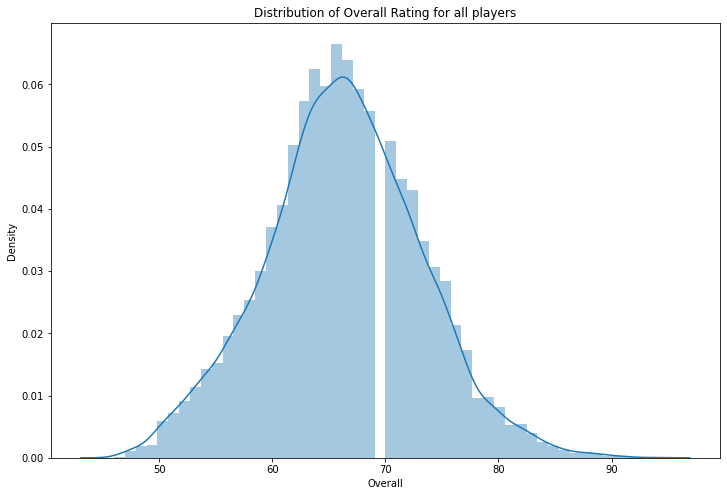

In [88]:
#analize the distribution by 'kde' plot.
plt.figure(figsize=(12,8))
sns.distplot(fifa['Overall'])
plt.title('Distribution of Overall Rating for all players')
plt.show()

In [89]:
# As per the plot my assumption is the ratings are almost normally sitributed
#so that ckeking the skewness and kurtosis 

print('The skewness of the data : ',fifa['Overall'].skew())
print('The Kurtosis of the data : ',fifa['Overall'].kurt())


The skewness of the data :  0.06718492227833812
The Kurtosis of the data :  0.09656866702634614


Data is normally distributed

### 2.Generate pair plots for the following variables:



##### Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

In [90]:
fifa['Overall'].isnull().sum()

0

In [91]:
fifa['Value'].isnull().sum()

0

In [92]:
fifa['Wage'].isnull().sum()

0

In [93]:
fifa['International Reputation'].isnull().sum()

0

In [94]:
fifa['Height'].isnull().sum()

0

In [95]:
fifa['Weight'].isnull().sum()

0

In [96]:
fifa['Release Clause'].isnull().sum()

0

In [98]:
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


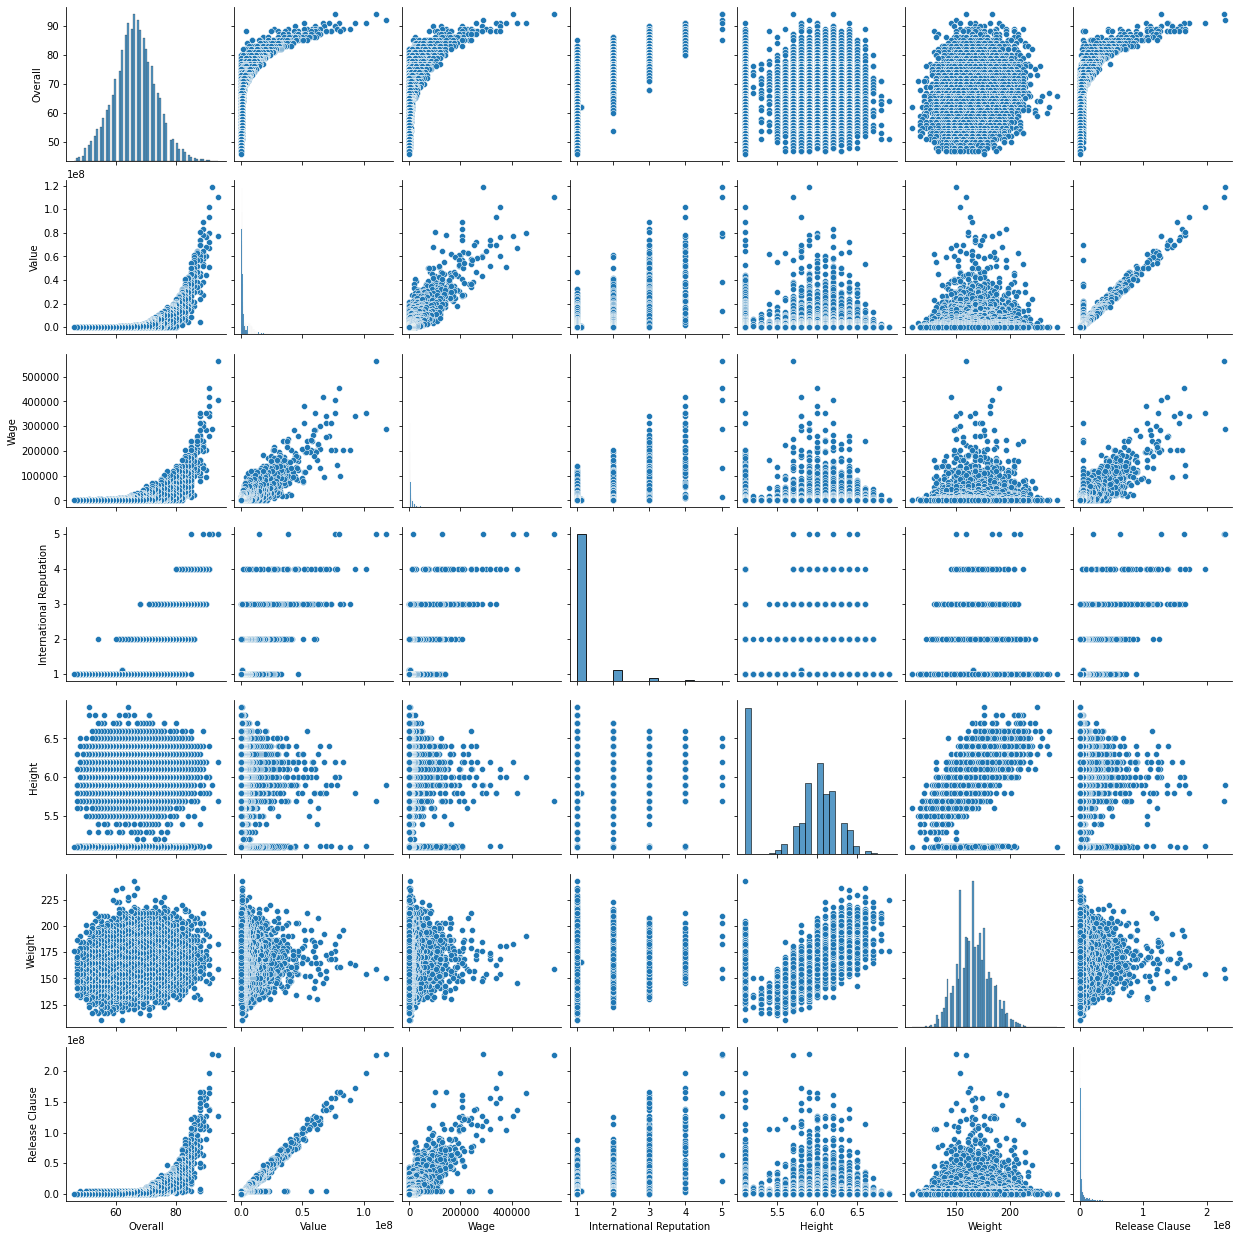

In [97]:
#Generate the pair plot
sns.pairplot(data=fifa,vars=['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause'])

### 3.Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [128]:
fifa['Contract Valid Until'] = pd.DatetimeIndex(fifa['Contract Valid Until']).year

In [129]:
fifa['Contract Valid Until'].head()

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: int64

In [130]:
fifa['Contract Valid Until'].fillna(2020,inplace=True)

In [131]:
fifa['Contract Valid Until']=fifa['Contract Valid Until'].astype(int)

In [132]:
fifa['Contract Valid Until'].isnull().sum()

0

In [136]:
Players_top20=fifa[fifa['Contract Valid Until']==2020].sort_values(by='Overall',ascending=False).head(20)
Players_top20

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,https://cdn.sofifa.org/players/4/19/179813.png,Uruguay,https://cdn.sofifa.org/flags/60.png,89,89,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
31,190460,C. Eriksen,26,https://cdn.sofifa.org/players/4/19/190460.png,Denmark,https://cdn.sofifa.org/flags/13.png,88,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
39,164240,Thiago Silva,33,https://cdn.sofifa.org/players/4/19/164240.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
50,175943,D. Mertens,31,https://cdn.sofifa.org/players/4/19/175943.png,Belgium,https://cdn.sofifa.org/flags/7.png,87,87,Napoli,https://cdn.sofifa.org/teams/2/light/48.png,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0


In [138]:
Players_top20['Position'].value_counts()

CB     3
RCB    3
LCM    2
LB     2
GK     2
LCB    1
CDM    1
RCM    1
LF     1
LS     1
RF     1
CAM    1
LM     1
Name: Position, dtype: int64

### a)What would the average wage for this set of players be?

In [137]:
#average of wage
wage_average=Players_top20['Wage'].mean()
print('The average wage for this set of players : ',wage_average)

The average wage for this set of players :  205450.0


### b)What is the average age?

In [104]:
# The average age
Average_of_age=Players_top20['Age'].mean()
print('The average age : ',Average_of_age)

The average age :  30.65


### c)Is there a correlation between the Overall rating and Value for these players?

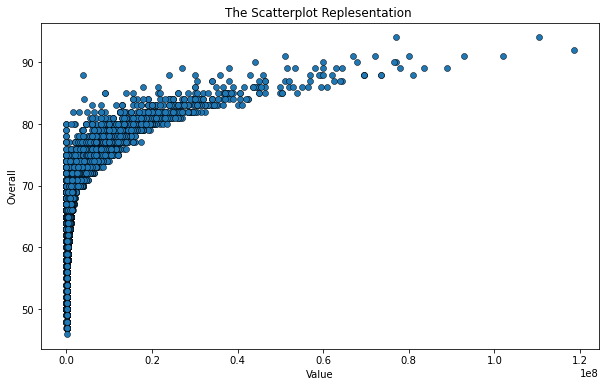

In [121]:
#find correlation through scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Value',y='Overall',data=fifa,edgecolor='k')
plt.title('The Scatterplot Replesentation ')
plt.show()

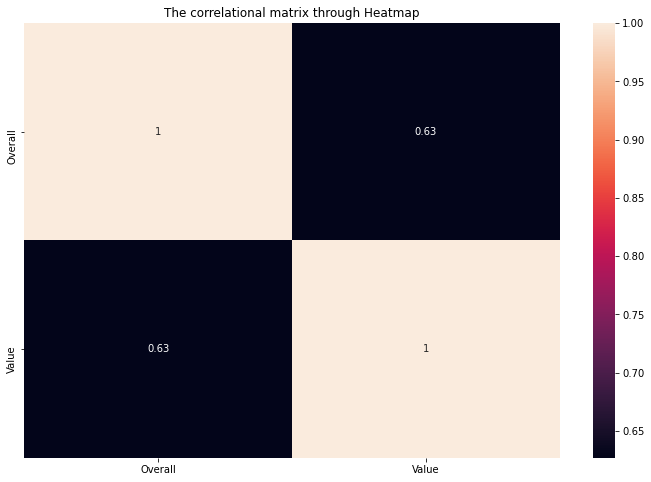

In [113]:
#Heatmap plot
plt.figure(figsize=(12,8))
matrix_correlation=fifa[['Overall','Value']].corr()
sns.heatmap(matrix_correlation,annot=True)
plt.title('The correlational matrix through Heatmap')
plt.show()

#According to the both above plot we can say that there is a very strong relation between vallue and overall rating

In [160]:
fifa[fifa['Contract Valid Until']==2020]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18166,243621,N. Ayéva,16,https://cdn.sofifa.org/players/4/19/243621.png,Sweden,https://cdn.sofifa.org/flags/46.png,48,72,Örebro SK,https://cdn.sofifa.org/teams/2/light/705.png,...,44.0,14.0,19.0,16.0,10.0,9.0,8.0,7.0,6.0,158000.0
18179,246243,J. Williams,17,https://cdn.sofifa.org/players/4/19/246243.png,England,https://cdn.sofifa.org/flags/14.png,48,64,Northampton Town,https://cdn.sofifa.org/teams/2/light/1930.png,...,37.0,42.0,51.0,49.0,14.0,11.0,7.0,11.0,8.0,119000.0
18187,240158,C. Ehlich,19,https://cdn.sofifa.org/players/4/19/240158.png,Germany,https://cdn.sofifa.org/flags/21.png,47,59,SpVgg Unterhaching,https://cdn.sofifa.org/teams/2/light/172.png,...,47.0,40.0,42.0,42.0,13.0,12.0,11.0,15.0,12.0,66000.0
18189,240160,A. Kaltner,18,https://cdn.sofifa.org/players/4/19/240160.png,Germany,https://cdn.sofifa.org/flags/21.png,47,61,SpVgg Unterhaching,https://cdn.sofifa.org/teams/2/light/172.png,...,37.0,28.0,15.0,22.0,15.0,5.0,14.0,12.0,8.0,125000.0


In [162]:
fifa['Position'].isnull().sum()

60

## 4.Generate tables containing the top 5 players by Overall rating for each unique position.

a)Are there any players appearing in more than one Table. Please point out such players.

b)What is the average wage one can expect to pay for the top 5 in every position?


In [ ]:
#we are filling the null for better analisis with 'ST'

In [163]:
fifa['Position'].fillna('ST')

0         RF
1         ST
2         LW
3         GK
4        RCM
        ... 
18202     CM
18203     ST
18204     ST
18205     RW
18206     CM
Name: Position, Length: 18207, dtype: object

In [164]:
#cheking null for the 'Position attribute'
fifa['Position'].isnull().sum()

60

In [165]:
#Cheking unique Position
fifa['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [167]:
#Checking Top 5 Goal Keepers
Goalkeepers_top5=fifa[fifa['Position']=='GK'].sort_values(by='Overall',ascending=False).head(5)
Goalkeepers_top5

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000.0
18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,123300000.0
19,192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,113700000.0
22,167495,M. Neuer,32,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,62700000.0


In [168]:
#calculate average Wage for goakeepers
print('Average wage: ','€',Goalkeepers_top5['Wage'].mean())

Average wage:  € 192800.0


In [170]:
#Checking Top 5 Defender
Defenders_top5=fifa[(fifa['Position']=='CB')|(fifa['Position']=='LCB')|(fifa['Position']=='RCB')|(fifa['Position']=='LB')|(fifa['Position']=='RB')|(fifa['Position']=='LWB')|(fifa['Position']=='RWB')].sort_values(by='Overall',ascending=False).head(5)
Defenders_top5

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
12,182493,D. Godín,32,https://cdn.sofifa.org/players/4/19/182493.png,Uruguay,https://cdn.sofifa.org/flags/60.png,90,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0
24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
34,178603,M. Hummels,29,https://cdn.sofifa.org/players/4/19/178603.png,Germany,https://cdn.sofifa.org/flags/21.png,88,88,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,91.0,88.0,90.0,88.0,15.0,6.0,10.0,5.0,6.0,75900000.0
35,176676,Marcelo,30,https://cdn.sofifa.org/players/4/19/176676.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,88200000.0


In [171]:
#calculate average Wage for Defenders
print('Average wage: ','€',Defenders_top5['Wage'].mean())

Average wage:  € 233000.0


In [173]:
#Cheking top 5 Midfielders
Midfielders_top5=fifa[(fifa['Position']=='LDM')|(fifa['Position']=='CDM')|(fifa['Position']=='RDM')|(fifa['Position']=='CM')|(fifa['Position']=='LCM')|(fifa['Position']=='RCM')|(fifa['Position']=='LM')|(fifa['Position']=='RM')].sort_values(by='Overall',ascending=False).head(5)
Midfielders_top5

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,156800000.0
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
14,215914,N. Kanté,27,https://cdn.sofifa.org/players/4/19/215914.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,85.0,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,121300000.0


In [174]:
#calculate average Wage for  Midfielders
print('Average wage: ','€',Midfielders_top5['Wage'].mean())

Average wage:  € 328000.0


In [176]:
#Cheking top 5 Attacker
Attackers_top5=fifa[(fifa['Position']=='CAM')|(fifa['Position']=='LAM')|(fifa['Position']=='RAM')|(fifa['Position']=='LW')|(fifa['Position']=='RW')|(fifa['Position']=='LF')|(fifa['Position']=='RF')|(fifa['Position']=='CF')].sort_values(by='Overall',ascending=False).head(5)
Attackers_top5

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
17,194765,A. Griezmann,27,https://cdn.sofifa.org/players/4/19/194765.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000.0


In [177]:
#calculate average Wage for Attacker
print('Average wage: ','€',Attackers_top5['Wage'].mean())

Average wage:  € 309000.0


In [180]:
#Combined the team 
Team_Combined = pd.concat([Attackers_top5,Goalkeepers_top5,Midfielders_top5,Defenders_top5], axis=0)
Team_Combined


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
17,194765,A. Griezmann,27,https://cdn.sofifa.org/players/4/19/194765.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000.0
18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,123300000.0
19,192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,113700000.0
22,167495,M. Neuer,32,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,62700000.0


In [181]:
#Create a xlsx file as name 'combined_team'
Team_Combined.to_excel('combined_team.xlsx')

In [182]:
#cheking the players who are in both table
Team_Combined[Team_Combined.duplicated()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


#There are no players who are part of more than one table

In [183]:
#Here are the average 'wage' & 'Total wage'
print('The average wage : ','€',Team_Combined['Wage'].mean())
print('Total wage : ','€',Team_Combined['Wage'].sum())

The average wage :  € 265700.0
Total wage :  € 5314000


In [184]:
#at last cretae my top 20 players xlsx file
Players_top20.to_excel('top20.xlsx')